In [1]:
import warnings
warnings.filterwarnings("ignore")
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, UpSampling2D, BatchNormalization, Activation, Flatten, Conv2D, Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
import numpy as np

#x = pickle.load(open("Grey.pickle","rb"))
#y = pickle.load(open("LAB.pickle","rb"))

#x= x/255.0
#y =np.array(y).reshape(-1,256,256,3)


In [2]:
X = np.load('X.npy')
print(X.shape)

(9294, 256, 256, 1)


In [3]:
y = np.load('y.npy')
print(y.shape)

(9294, 256, 256, 2)


In [4]:
model = Sequential(name= 'colorizer')

#conv1
model.add(Conv2D(64,(3,3), input_shape= X.shape[1:], strides=2, padding='same', use_bias=True, name='L1Conv1'))
model.add(Activation("relu"))
model.add(Conv2D(64, (3,3), strides=1, padding='same', use_bias=True, name='L1Conv2'))
model.add(BatchNormalization())
model.add(Activation("relu"))


#conv2
model.add(Conv2D(128, (3,3), strides=2, padding='same', use_bias=True, name='L2Conv1'))
model.add(Activation("relu"))
model.add(Conv2D(128, (3,3), strides=1, padding='same', use_bias=True, name='L2Conv2'))
model.add(BatchNormalization())
model.add(Activation("relu"))

          
#conv3
model.add(Conv2D(256, (3,3), strides=2, padding='same', use_bias=True, name='L3Conv1'))
model.add(Activation("relu"))
model.add(Conv2D(256, (3,3), strides=1, padding='same', use_bias=True, name='L3Conv2'))
model.add(Activation("relu"))
model.add(Conv2D(256, (3,3), strides=1, padding='same', use_bias=True, name='L3Conv3'))
model.add(BatchNormalization())
model.add(Activation("relu"))

          
#conv4
model.add(Conv2D(512, (3,3), strides=1, padding='same', use_bias=True, name='L4Conv1'))
model.add(Activation("relu"))
model.add(Conv2D(512, (3,3), strides=1, padding='same', use_bias=True, name='L4Conv2'))
model.add(Activation("relu"))
model.add(Conv2D(512, (3,3), strides=1, padding='same', use_bias=True, name='L4Conv3'))
model.add(BatchNormalization())
model.add(Activation("relu"))


#conv5
model.add(Conv2D(512, (3,3), dilation_rate=2, strides=1, padding='same', use_bias=True, name='L5Conv1'))
model.add(Activation("relu"))
model.add(Conv2D(512, (3,3), dilation_rate=2, strides=1, padding='same', use_bias=True, name='L5Conv2'))
model.add(Activation("relu"))
model.add(Conv2D(512, (3,3), dilation_rate=2,  strides=1, padding='same', use_bias=True, name='L5Conv3'))
model.add(BatchNormalization())
model.add(Activation("relu"))

    
#conv6
'''model.add(Conv2D(512, (3,3), dilation_rate=2, strides=1, padding='same', use_bias=True,name='L6Conv1'))
model.add(Activation("relu"))
model.add(Conv2D(512, (3,3), dilation_rate=2, strides=1, padding='same', use_bias=True, name='L6Conv2'))
model.add(Activation("relu"))
model.add(Conv2D(512, (3,3), dilation_rate=2, strides=1, padding='same', use_bias=True, name='L6Conv3'))
model.add(Activation("relu"))
model.add(BatchNormalization())'''

#conv7
'''model.add(Conv2D(512, (3,3), strides=1, padding='same', use_bias=True, name='L7Conv1'))
model.add(Activation("relu"))
model.add(Conv2D(512, (3,3), strides=1, padding='same', use_bias=True, name='L7Conv2'))
model.add(Activation("relu"))
model.add(Conv2D(512, (3,3), strides=1, padding='same', use_bias=True, name='L7Conv3'))
model.add(Activation("relu"))
model.add(BatchNormalization())'''

#conv8
model.add(Conv2DTranspose(256, (4,4), strides=2, padding='same', use_bias=True, name='L8ConvTr1'))
model.add(Activation("relu"))
#model.add(Conv2D(256, (3,3), strides=1, padding='same', use_bias=True, name='L8Conv2'))
#model.add(Activation("relu"))
model.add(Conv2D(256, (3,3), strides=1, padding='same', use_bias=True, name='L8Conv2'))
model.add(Activation("relu"))
model.add(Conv2D(256, (3,3), strides=1, padding='same', use_bias=True, name='L8Conv3'))
model.add(BatchNormalization())
model.add(Activation("relu"))

          
#conv9
model.add(Conv2DTranspose(128, (4,4), strides=2, padding='same', use_bias=True, name='L9ConvTr1'))
model.add(Activation("relu"))
#model.add(Conv2D(128, (3,3), strides=1, padding='same', use_bias=True, name='L9Conv2'))
#model.add(Activation("relu"))
model.add(Conv2D(128, (3,3), strides=1, padding='same', use_bias=True, name='L9Conv2'))
model.add(BatchNormalization())
model.add(Activation("relu"))


#conv10
model.add(Conv2DTranspose(128, (4,4), strides=2, padding='same', use_bias=True, name='L10ConvTr1'))
model.add(Activation("relu"))
#model.add(Conv2D(128, (3,3), strides=1, padding='same', use_bias=True, name='L10Conv2'))
#model.add(Activation("relu"))
model.add(Conv2D(128, (3,3), dilation_rate=1, strides=1, padding='same', use_bias=True, name='L10Conv2'))
model.add(BatchNormalization())
model.add(Activation(LeakyReLU(alpha=0.2)))
 
          
#model.add(UpSampling2D(size = (2,2)))         

#model.add(Conv2D(2, (1,1)))
#model.add(UpSampling2D(size=(2,2)))
model.add(Conv2D(2,(1,1), strides=1, padding='same', dilation_rate=1, use_bias=True, name='OutputLayer'))

model.compile(loss='mean_squared_error',
             optimizer=Adam(lr=0.01),
             metrics=['accuracy'])



In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1Conv1 (Conv2D)             (None, 128, 128, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 64)      0         
_________________________________________________________________
L1Conv2 (Conv2D)             (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
L2Conv1 (Conv2D)             (None, 64, 64, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 128)       0         
__________

In [7]:
model.fit(X, y, epochs=50, batch_size=16)

Epoch 1/50
9294/9294 [==============================] - 1031s 111ms/step - loss: 2695.1133 - acc: 0.5434
Epoch 2/50
9294/9294 [==============================] - 1015s 109ms/step - loss: 2664.0423 - acc: 0.5447
Epoch 3/50
9294/9294 [==============================] - 1015s 109ms/step - loss: 2633.1065 - acc: 0.5523
Epoch 4/50
9294/9294 [==============================] - 1011s 109ms/step - loss: 2605.9837 - acc: 0.5567
Epoch 5/50
9294/9294 [==============================] - 1011s 109ms/step - loss: 2587.0958 - acc: 0.5585
Epoch 6/50
9294/9294 [==============================] - 1011s 109ms/step - loss: 2579.2847 - acc: 0.5612
Epoch 7/50
9294/9294 [==============================] - 1012s 109ms/step - loss: 2565.8589 - acc: 0.5633
Epoch 8/50
9294/9294 [==============================] - 1011s 109ms/step - loss: 2560.3694 - acc: 0.5656
Epoch 9/50
9294/9294 [==============================] - 1012s 109ms/step - loss: 2550.5165 - acc: 0.5685
Epoch 10/50
9294/9294 [==============================] 

In [156]:
model.save('uplong-model-50ep.h5')

AttributeError: 'LeakyReLU' object has no attribute '__name__'

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import cv2

In [162]:
def separate_channel(img_rgb):
    img_lab = skimage.color.rgb2lab(img_rgb)
    l, a, b = cv2.split(img_lab)
    return l,a,b

img = skimage.io.imread('./t/dJzoQr.jpg')
#img_list.append(img)
l1,_,_ = separate_channel(img)

In [163]:
pred = model.predict(l1.reshape(1,256,256,1))

In [164]:
arr = np.zeros((1,256,256,3))
for hei in range(len(pred[0])):
    for wid in range(len(pred[0][0])):
        arr[0][hei][wid] = np.array([l1[hei][wid], pred[0][hei][wid][0], pred[0][hei][wid][1]])

In [165]:
img_rgb = skimage.color.lab2rgb(arr[0])

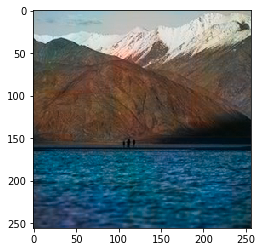

In [166]:
plt.imshow(img_rgb)

In [115]:
model.save_weights("uplong-model-50ep.h5")